Waste Management using CNN Model


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [4]:
train_path="Dataset/TRAIN"
test_path="Dataset/TEST"

In [5]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [28]:


x_data, y_data = [], []
for category in glob(train_path + "/*"):
    for file in tqdm(glob(category + "/*")):
        img = cv2.imread(file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (150, 150))  
        x_data.append(img)
        y_data.append(category.split('/')[-1])


100%|██████████| 9999/9999 [00:09<00:00, 1002.42it/s]


In [29]:
# Convert to NumPy arrays and normalize
x_data = np.array(x_data) / 255.0

# Label Encoding
from sklearn.preprocessing import LabelEncoder
from glob import glob
from tensorflow.keras.utils import to_categorical
encoder = LabelEncoder()
y_data = encoder.fit_transform(y_data)
y_data = to_categorical(y_data)  # Convert labels to one-hot encoding

In [30]:
# Train-test split
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, stratify=y_data, random_state=42)

Label Distribution - Pie Chart

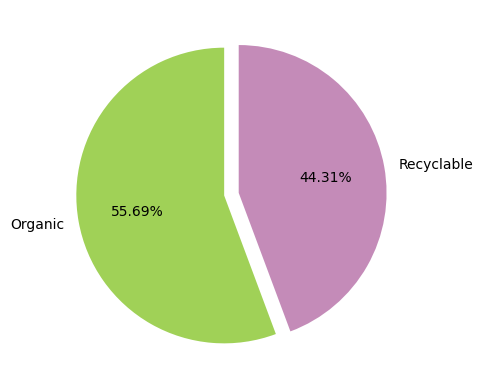

In [31]:
colors = ["#a0d157", "#c48bb8"]
plt.pie(data.label.value_counts(), labels = ["Organic","Recyclable"], autopct = '%0.2f%%', colors = colors, startangle = 90, explode = [0.05, 0.05] ) #explode is optional
plt.show()

Label Frequency (Bar Plot)

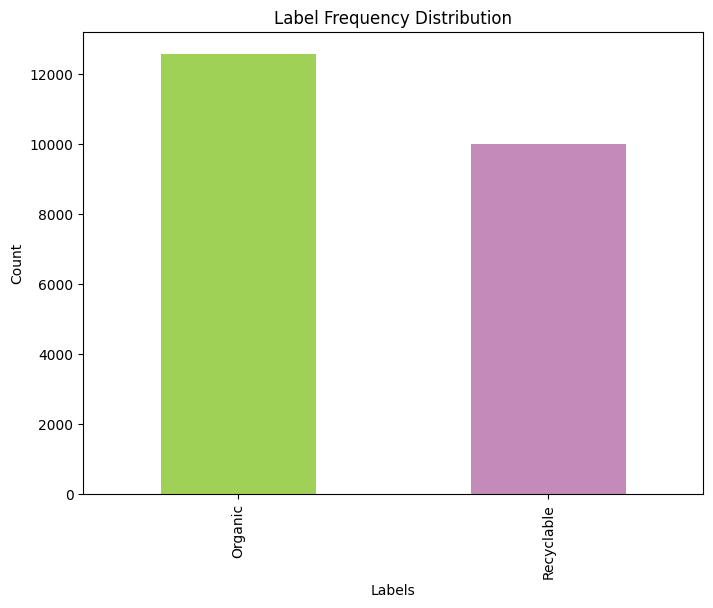

In [32]:
data['label'] = data['label'].replace({'TRAIN\O': 'Organic', 'TRAIN\R': 'Recyclable'})
plt.figure(figsize=(8, 6))
data['label'].value_counts().plot(kind='bar', color=colors)
plt.title('Label Frequency Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

Image Size Distribution (Histogram)

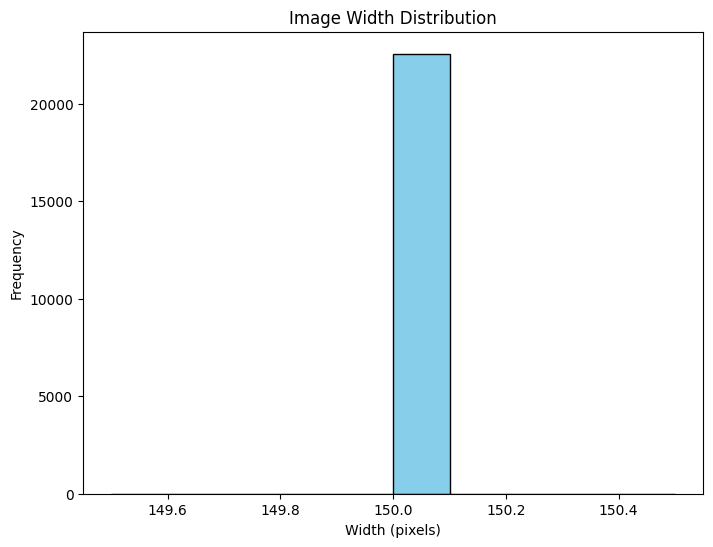

In [33]:
image_sizes = [img.shape[0] for img in x_data] 
plt.figure(figsize=(8, 6))
plt.hist(image_sizes, bins=10, color='skyblue', edgecolor='black')
plt.title('Image Width Distribution')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')
plt.show()


Image Preview

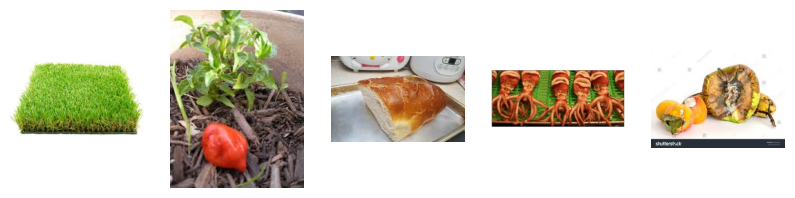

In [34]:
sample_images = np.random.choice(data['image'], 5)  
plt.figure(figsize=(10, 10))

for i, img in enumerate(sample_images):
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()

**WEEK 2**

CNN - Convolutional Neural Network

In [35]:
# Model Architecture
def build_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
        MaxPooling2D(2,2),
        BatchNormalization(),

        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        BatchNormalization(),

        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        BatchNormalization(),

        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(y_train.shape[1], activation='softmax')
    ])
    return model

In [36]:
# Compile Model
model = build_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train Model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=32)

Epoch 1/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 169s 292ms/step - accuracy: 0.7637 - loss: 1.1502 - val_accuracy: 0.8134 - val_loss: 0.5480
Epoch 2/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 157s 277ms/step - accuracy: 0.8686 - loss: 0.4338 - val_accuracy: 0.8243 - val_loss: 0.5358
Epoch 3/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 155s 275ms/step - accuracy: 0.9089 - loss: 0.2633 - val_accuracy: 0.8600 - val_loss: 0.5570
Epoch 4/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 156s 276ms/step - accuracy: 0.9430 - loss: 0.1613 - val_accuracy: 0.8509 - val_loss: 0.5305
Epoch 5/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 156s 276ms/step - accuracy: 0.9577 - loss: 0.1236 - val_accuracy: 0.8394 - val_loss: 0.6888
Epoch 6/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 156s 277ms/step - accuracy: 0.9543 - loss: 0.1368 - val_accuracy: 0.8440 - val_loss: 0.6112
Epoch 7/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 156s 277ms/step - accuracy: 0.9687 - loss: 0.0961 - val_accuracy: 0.8591 - val_loss: 0.6531
Epoch 8/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 155s 275ms/step - accuracy: 0.9745 -

In [37]:
loss, accuracy = model.evaluate(x_val, y_val)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")


142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.8519 - loss: 0.7818
Validation Loss: 0.8161
Validation Accuracy: 0.8511


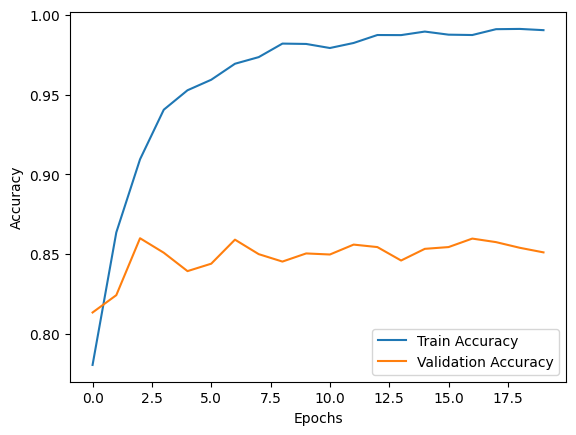

In [38]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [39]:
# Prediction on Test Images
def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (150, 150)) / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    predicted_label = encoder.inverse_transform([np.argmax(prediction)])[0]
    return predicted_label

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


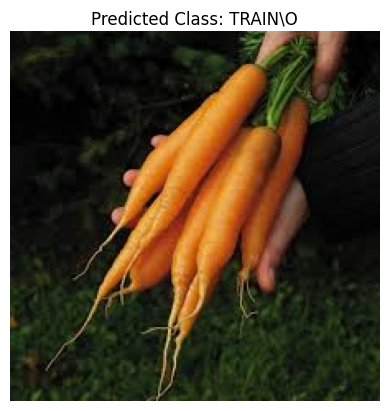

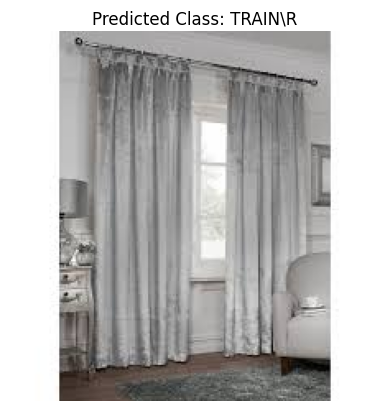

In [49]:
import matplotlib.pyplot as plt
sample_image1 = "Dataset\TEST\O\O_12569.jpg"  
sample_image2 = "Dataset\TEST\R\R_10010.jpg"
predicted_class = predict_image(sample_image1)
predicted_class2= predict_image(sample_image2)
image = cv2.imread(sample_image1)  
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title(f"Predicted Class: {predicted_class}")
plt.axis('off') 
plt.show()
image2 = cv2.imread(sample_image2)  
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
plt.imshow(image2)
plt.title(f"Predicted Class: {predicted_class2}")
plt.axis('off') 
plt.show()